## INTRODUCTION

In this assignment, students will be using the K-nearest neighborsalgorithm to predict how many points NBA players scored in the 2013-2014 season.

Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
<br>
Here are some selected columns from the data:
- player - name of the player
- pos - the position of the player
- g - number of games the player was in
- gs - number of games the player started
- pts - total points the player scored

There are many more columns in the data, mostly containing information about average player game performance over the course of the season.

In [1]:
# load the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the file
nba_data = pd.read_csv("nba_2013.csv")

In [3]:
nba_data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
# List all the columns
list(nba_data.columns)

['player',
 'pos',
 'age',
 'bref_team_id',
 'g',
 'gs',
 'mp',
 'fg',
 'fga',
 'fg.',
 'x3p',
 'x3pa',
 'x3p.',
 'x2p',
 'x2pa',
 'x2p.',
 'efg.',
 'ft',
 'fta',
 'ft.',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 'season',
 'season_end']

### NOTE

- Player name and Team id has no significance, so will drop it.
- We already know that it for season 13-14 so drop the last 2 columns.
- Position is also has no signifance as the rest of the parameters in the dataframe will encapsulate position level details.

### Check for null values

In [5]:
nba_data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

### Handle the null values

In [6]:
nba_data.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [7]:
# Replace the null values with mean 
nba_data['x3p.'] = nba_data['x3p.'].fillna(nba_data['x3p.'].mean())

In [8]:
nba_data['ft.'] = nba_data['ft.'].fillna(nba_data['ft.'].mean())

In [9]:
nba_data['fg.'] = nba_data['fg.'].fillna(nba_data['fg.'].mean())
nba_data['x2p.'] = nba_data['x2p.'].fillna(nba_data['x2p.'].mean())
nba_data['efg.'] = nba_data['efg.'].fillna(nba_data['efg.'].mean())

In [10]:
nba_data.isnull().sum().sum()

0

### APPLY MODEL

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [12]:
# Independent Variables
ind_var = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']
# Dependent Variables
dep_var = ["pts"]


In [13]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(nba_data[ind_var], nba_data[dep_var], test_size=0.2)

In [14]:
score_list = []
# Run in loop to see which is the best value of K to be used
for i in range(2, 50):
    # Create instance of the model
    knn = KNeighborsRegressor(n_neighbors=i, n_jobs=-1)
    # Fit the data
    knn.fit(X_train, y_train)
    # Predict
    predict = knn.predict(X_test)
    # Check for accuracy
    score_list.append( r2_score(y_test, predict))
    print ("For k = ", i, " Accuracy is : " , r2_score(y_test, predict))

For k =  2  Accuracy is :  0.9730460205387425
For k =  3  Accuracy is :  0.9766334440875576
For k =  4  Accuracy is :  0.9826526462509356
For k =  5  Accuracy is :  0.985347251749371
For k =  6  Accuracy is :  0.9838064674566
For k =  7  Accuracy is :  0.9825176698066187
For k =  8  Accuracy is :  0.982466523807231
For k =  9  Accuracy is :  0.9823823607904676
For k =  10  Accuracy is :  0.9814334932801457
For k =  11  Accuracy is :  0.9782006406633994
For k =  12  Accuracy is :  0.9774140968849153
For k =  13  Accuracy is :  0.9747045240782705
For k =  14  Accuracy is :  0.9736009739096935
For k =  15  Accuracy is :  0.9718365934245572
For k =  16  Accuracy is :  0.9689222279709627
For k =  17  Accuracy is :  0.9663547093416414
For k =  18  Accuracy is :  0.9645276891426114
For k =  19  Accuracy is :  0.964478919344483
For k =  20  Accuracy is :  0.9626378574015155
For k =  21  Accuracy is :  0.9602238338653163
For k =  22  Accuracy is :  0.9573525869600811
For k =  23  Accuracy is : 

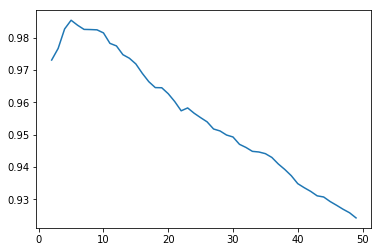

In [15]:
plt.plot(range(2,50), score_list)

### INFERENCE

From the data prinated and the gtraph. k=5 will be used

### RECREATE THE MODEL WITH K VALUE DETERMINED

In [16]:
knn_new = KNeighborsRegressor(n_neighbors=5)

In [17]:
knn_new.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [18]:
predict_new = knn_new.predict(X_test)

In [19]:
r2_score(y_test, predict_new)

0.985347251749371

In [20]:
mean_absolute_error(y_test, predict_new)

40.27216494845361

### TEST THE MODEL

In [21]:
nba_data[nba_data["player"] == "LeBron James"]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
225,LeBron James,PF,29,MIA,77,77,2902,767,1353,0.567,...,452,533,488,121,26,270,126,2089,2013-2014,2013


In [22]:
nba_test = nba_data[nba_data["player"] == "LeBron James"][ind_var]

In [23]:
nba_test

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
225,29,77,77,2902,767,1353,0.567,116,306,0.379085,...,585,0.75,81,452,533,488,121,26,270,126


In [24]:
knn_new.predict(nba_test)

array([[1986.]])